In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ydata_profiling import ProfileReport
import warnings

warnings.filterwarnings("ignore")

## Загрузка данных и первичный анализ

In [186]:
df = pd.read_csv('data/game_awards_nominees.csv')

In [187]:
df.head()

,type,name,steam_appid,is_free,controller_support,dlc,short_description,pc_requirements,mac_requirements,linux_requirements,developers,publishers,price_overview,platforms,metacritic,genres,release_date,award_name
0,game,counter-strike,10,False,NaN,NaN,Play the world's number 1 online action game. ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 1450, 'final': ...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",not nominated
1,game,team fortress classic,20,False,NaN,NaN,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}",not nominated
2,game,day of defeat,30,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}",not nominated
3,game,deathmatch classic,40,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Jun, 2001'}",not nominated
4,game,half-life: opposing force,50,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Gearbox Software'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 1999'}",not nominated


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                1066 non-null   object
 1   name                1072 non-null   object
 2   steam_appid         1072 non-null   int64 
 3   is_free             1066 non-null   object
 4   controller_support  463 non-null    object
 5   dlc                 607 non-null    object
 6   short_description   1066 non-null   object
 7   pc_requirements     1066 non-null   object
 8   mac_requirements    1066 non-null   object
 9   linux_requirements  1066 non-null   object
 10  developers          1065 non-null   object
 11  publishers          1066 non-null   object
 12  price_overview      789 non-null    object
 13  platforms           1066 non-null   object
 14  metacritic          631 non-null    object
 15  genres              1064 non-null   object
 16  release_date        1066

## Обработка пропусков и дубликатов, преобразование данных

In [189]:
df.isnull().sum()

type                    6
name                    0
steam_appid             0
is_free                 6
controller_support    609
dlc                   465
short_description       6
pc_requirements         6
mac_requirements        6
linux_requirements      6
developers              7
publishers              6
price_overview        283
platforms               6
metacritic            441
genres                  8
release_date            6
award_name              0
dtype: int64

In [190]:
df.duplicated().sum()

1

In [191]:
df.drop_duplicates()

,type,name,steam_appid,is_free,controller_support,dlc,short_description,pc_requirements,mac_requirements,linux_requirements,developers,publishers,price_overview,platforms,metacritic,genres,release_date,award_name
0,game,counter-strike,10,False,NaN,NaN,Play the world's number 1 online action game. ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 1450, 'final': ...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",not nominated
1,game,team fortress classic,20,False,NaN,NaN,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}",not nominated
2,game,day of defeat,30,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}",not nominated
3,game,deathmatch classic,40,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Jun, 2001'}",not nominated
4,game,half-life: opposing force,50,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Gearbox Software'],['Valve'],"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 1999'}",not nominated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,game,inside the backrooms,1987080,False,NaN,NaN,Inside the Backrooms is a horror multiplayer g...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'AUD', 'initial': 1000, 'final': ...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': '25', 'description': 'Adventure'}, {'i...","{'coming_soon': False, 'date': '20 Jun, 2022'}",not nominated
1068,game,resident evil 4,2050650,False,full,"[2109315, 2109301, 2109303, 2109304, 2109305, ...",Survival is just the beginning. Six years have...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'AUD', 'initial': 8549, 'final': ...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...","{'coming_soon': False, 'date': '23 Mar, 2023'}",Game of the Year
1069,game,resident evil 4,2050650,False,full,"[2109315, 2109301, 2109303, 2109304, 2109305, ...",Survival is just the beginning. Six years have...,{'minimum': '<stron

In [192]:
df['price_overview'] = df['price_overview'].fillna("{'final': '0'}")
df['price_overview'] = df['price_overview'].apply(lambda x: float(ast.literal_eval(x)['final'])/100)

df['metacritic'] = df['metacritic'].fillna("{'score': '0'}")
df['metacritic'] = df['metacritic'].apply(lambda x: float(ast.literal_eval(x)['score']))

In [193]:
df['genres'] = df['genres'].fillna("[{'id': '0', 'description': 'Unknown'}]")

In [194]:
problematic_columns = ['type', 'controller_support', 'dlc', 'short_description', 'award_name']
df[problematic_columns] = df[problematic_columns].fillna('Unknown')


df.isnull().sum()

type                  0
name                  0
steam_appid           0
is_free               6
controller_support    0
dlc                   0
short_description     0
pc_requirements       6
mac_requirements      6
linux_requirements    6
developers            7
publishers            6
price_overview        0
platforms             6
metacritic            0
genres                0
release_date          6
award_name            0
dtype: int64

In [195]:
df = df.dropna()

In [196]:
df['genres'] = df['genres'].apply(ast.literal_eval)

In [197]:
df['genre_id'] = df['genres'].apply(lambda x: [item['id'] for item in x] if x else ['0'])
df['genre'] = df['genres'].apply(lambda x: [item['description'] for item in x] if x else ['Unknown'])

In [198]:
df = df.explode('genre_id')

In [199]:
df = df.explode('genre')

In [200]:
df['release_date'] = df['release_date'].apply(lambda x: x['date'] if isinstance(x, dict) and 'date' in x else x)

## Делаем часть разведывательного анализа с помощью ydata_profiling

In [201]:
profile = ProfileReport(df, title='Profile Report')
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Гистограмма распределения оценок Metacritic

In [202]:
%matplotlib inline

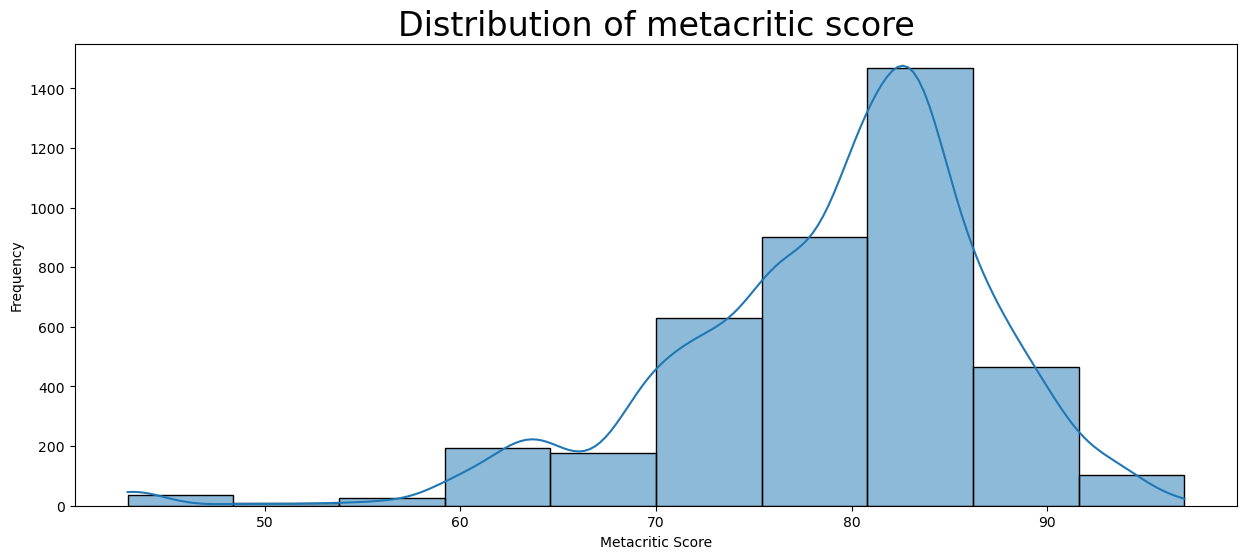

In [203]:
has_metacritic = df[df['metacritic'] > 0]

plt.figure(figsize=(15, 6))
sns.histplot(x=has_metacritic['metacritic'], kde=True, bins=10, edgecolor='black', palette='viridis', multiple="layer")
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.title('Distribution of metacritic score', size = 24)
plt.show()

## Топ-5 игр по оценкам Metacritic

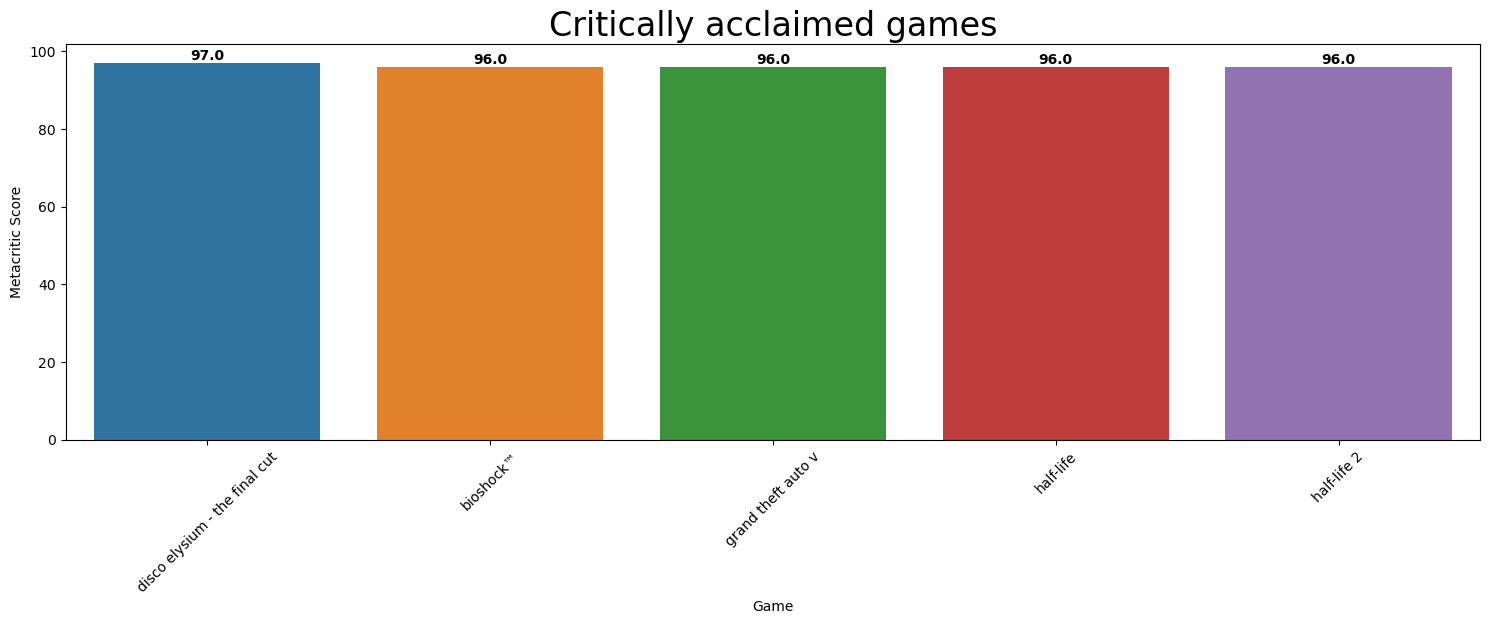

In [204]:
top_5_critics = has_metacritic.nlargest(5, 'metacritic')

plt.figure(figsize = (15,6))
average_score_by_genre = top_10_critics.groupby('name')['metacritic'].mean().sort_values(ascending=False)
sns.barplot(x = average_score_by_genre.index, y = average_score_by_genre)
plt.xticks(rotation=45)

for index, value in enumerate(average_score_by_genre):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontweight = 'bold')
plt.xlabel('Game')
plt.ylabel('Metacritic Score')
plt.tight_layout()
plt.title('Critically acclaimed games', size = 24)
plt.show()

## Гистограмма распределения цен

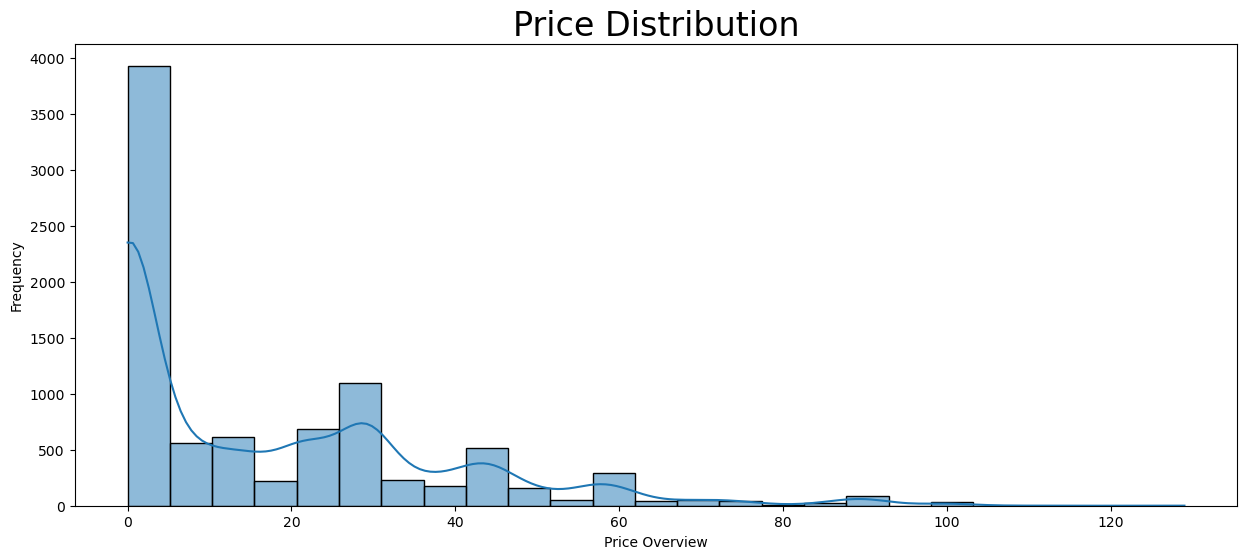

In [205]:
plt.figure(figsize=(15, 6))
sns.histplot(x = df['price_overview'], bins = 25, edgecolor = 'black', palette = None, kde = True)
plt.xlabel('Price Overview')
plt.ylabel('Frequency')
plt.title('Price Distribution', size = 24)
plt.show()

## Тепловая карта корреляции числовых и бинарных признаков

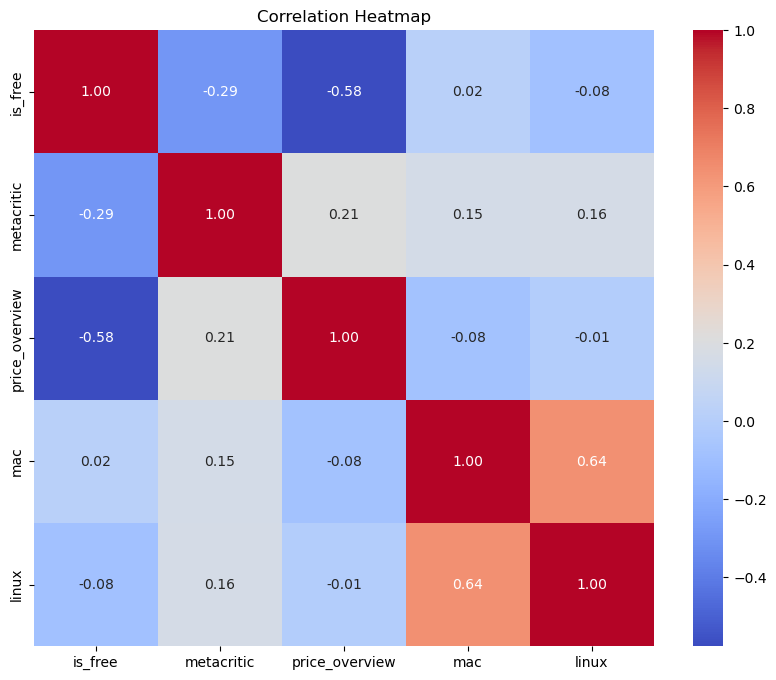

In [206]:
df['platforms'] = df['platforms'].apply(ast.literal_eval)

df['windows'] = df['platforms'].apply(lambda x: x.get('windows', False))
df['mac'] = df['platforms'].apply(lambda x: x.get('mac', False))
df['linux'] = df['platforms'].apply(lambda x: x.get('linux', False))

numeric_features = ['is_free', 'metacritic', 'price_overview', 'mac', 'linux']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Как эти данные могут быть использованы в целях машинного обучения:

### 1) Прогнозирование цен на игры:
Используя информацию о характеристиках игр (например, платформы, жанры, разработчики), можно попытаться построить модель для прогнозирования цен на игры. 

### 2) Классификация игр:
На основе информации о жанрах, платформах и других характеристиках можно создать модель классификации, которая определяет, к какой категории или жанру относится игра.

### 3) Прогнозирование оценок Metacritic:
Используя данные о характеристиках игр, можно попытаться создать модель, предсказывающую оценки Metacritic.

### 4) Анализ трендов в игровой индустрии:
Используя информацию о датах релиза и жанрах, можно провести анализ трендов в игровой индустрии, определяя, какие жанры популярны в разные периоды времени.

### 5) Кластеризация игр:
Применение методов кластеризации к данным о характеристиках игр может помочь выявить группы схожих игр, что может быть полезно для персонализации рекомендаций.

### 6) Определение факторов успеха игр:
Используя различные характеристики игр, можно попытаться выделить факторы, влияющие на их успех.

### 7) Предсказать критерии номинирования на The Game Awards и, возможно, победителей:
Если дополнить датасет данными прошлых лет, то можно и попробовать))